In [ ]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.datasets import fashion_mnist

import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


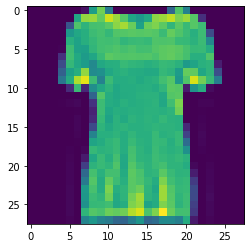

In [ ]:
plt.imshow(train_images[10,:,:])
plt.show()

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

In [ ]:
print(train_images.shape) # (60000, 28, 28)
print(test_images.shape)  # (10000, 28, 28)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
train_images = train_images.reshape((-1, train_images.shape[1] * train_images.shape[2]))
test_images = test_images.reshape((-1, test_images.shape[1] * test_images.shape[2]))

print(train_images.shape) # (60000, 784)
print(test_images.shape)  # (10000, 784)

(60000, 784)
(10000, 784)


In [ ]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
model1 = Sequential(name='my_model1')
model1.add(Dense(128, activation='relu', input_shape=(784,)))

model1.add(Dense(10, activation='softmax'))

In [ ]:
model1.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [ ]:
model1.summary()

Model: "my_model1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
hh = model1.fit(
  train_images,
  to_categorical(train_labels),
  epochs=5,
  batch_size=32, validation_split=0.2
)

model1.evaluate(
  test_images,
  to_categorical(test_labels)
)

predictions = model1.predict(test_images[:5])

print(np.argmax(predictions, axis=1)) 

print(test_labels[:5]) 

Epoch 1/5
1500/1500 [==============================] - 10s 6ms/step - loss: 0.4991 - accuracy: 0.8208 - val_loss: 0.4253 - val_accuracy: 0.8449
Epoch 2/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3840 - accuracy: 0.8606 - val_loss: 0.3814 - val_accuracy: 0.8614
Epoch 3/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3471 - accuracy: 0.8725 - val_loss: 0.3602 - val_accuracy: 0.8717
Epoch 4/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3217 - accuracy: 0.8834 - val_loss: 0.3489 - val_accuracy: 0.8723
Epoch 5/5
1/1 [==============================] - 0s 90ms/step
[9 2 1 1 6]
[9 2 1 1 6]


In [ ]:
hh.history

{'loss': [0.49913427233695984,
  0.3840453028678894,
  0.3470517694950104,
  0.3217220604419708,
  0.3030042052268982],
 'accuracy': [0.8208333253860474,
  0.8605833053588867,
  0.8724583387374878,
  0.8834166526794434,
  0.8887291550636292],
 'val_loss': [0.42533525824546814,
  0.38137003779411316,
  0.3601757287979126,
  0.34885334968566895,
  0.39802631735801697],
 'val_accuracy': [0.8449166417121887,
  0.8614166378974915,
  0.871666669845581,
  0.8722500205039978,
  0.8554166555404663]}

In [ ]:
model2 = Sequential(name='my_model2')
model2.add(Dense(64, activation='relu', input_shape=(784,)))

model2.add(Dense(10, activation='softmax'))

In [ ]:
model2.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [ ]:
model2.summary()

Model: "my_model2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                50240     
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [ ]:
hh2 = model2.fit(
  train_images,
  to_categorical(train_labels),
  epochs=5,
  batch_size=32, validation_split=0.2
)

model2.evaluate(
  test_images,
  to_categorical(test_labels)
)

predictions = model2.predict(test_images[:5])

print(np.argmax(predictions, axis=1)) 

print(test_labels[:5]) 

Epoch 1/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5238 - accuracy: 0.8138 - val_loss: 0.4336 - val_accuracy: 0.8416
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3980 - accuracy: 0.8569 - val_loss: 0.3908 - val_accuracy: 0.8596
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3625 - accuracy: 0.8683 - val_loss: 0.3733 - val_accuracy: 0.8649
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3367 - accuracy: 0.8770 - val_loss: 0.3626 - val_accuracy: 0.8699
Epoch 5/5
1/1 [==============================] - 0s 53ms/step
[9 2 1 1 6]
[9 2 1 1 6]


In [ ]:
layers1 = [
        Dense(64, activation='relu', input_shape=(784,)),
        Dense(64, activation='tanh'),
        Dense(10, activation='softmax'),
                      ]
layers2 = [
        Dense(64, activation='relu', input_shape=(784,)),
        Dense(64, activation='tanh'),
        Dense(64, activation='tanh'),
        Dense(64, activation='tanh'),
        Dense(10, activation='softmax'),
                      ]
layers3 = [
        Dense(64, activation='relu', input_shape=(784,)),
        Dense(64, activation='tanh'),
        Dense(64, activation='tanh'),
        Dense(64, activation='tanh'),
        Dense(64, activation='tanh'),
        Dense(64, activation='tanh'),
        Dense(64, activation='tanh'),
        Dense(64, activation='tanh'),
        Dense(64, activation='tanh'),
        Dense(10, activation='softmax'),
                      ]

In [ ]:
model3 = Sequential(layers1)
model3.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [ ]:
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                50240     
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dense_6 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model4 = Sequential(layers2)
model4.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [ ]:
model5 = Sequential(layers3)
model5.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [ ]:
model5.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                50240     
                                                                 
 dense_13 (Dense)            (None, 64)                4160      
                                                                 
 dense_14 (Dense)            (None, 64)                4160      
                                                                 
 dense_15 (Dense)            (None, 64)                4160      
                                                                 
 dense_16 (Dense)            (None, 64)                4160      
                                                                 
 dense_17 (Dense)            (None, 64)                4160      
                                                                 
 dense_18 (Dense)            (None, 64)               

In [ ]:
def hhl(models):
    hh = models.fit(
      train_images,
      to_categorical(train_labels),
      epochs=25,
      batch_size=32, validation_split=0.2
    )

    models.evaluate(
      test_images,
      to_categorical(test_labels)
    )

    predictions = models.predict(test_images[:5])

    print(np.argmax(predictions, axis=1)) 

    print(test_labels[:5])
    
    return hh

In [ ]:
hh_1 = hhl(model3)

Epoch 1/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5123 - accuracy: 0.8170 - val_loss: 0.4178 - val_accuracy: 0.8503
Epoch 2/25
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3858 - accuracy: 0.8590 - val_loss: 0.3698 - val_accuracy: 0.8654
Epoch 3/25
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3486 - accuracy: 0.8706 - val_loss: 0.3691 - val_accuracy: 0.8661
Epoch 4/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3268 - accuracy: 0.8801 - val_loss: 0.3665 - val_accuracy: 0.8650
Epoch 5/25
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3097 - accuracy: 0.8864 - val_loss: 0.3393 - val_accuracy: 0.8737
Epoch 6/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2930 - accuracy: 0.8918 - val_loss: 0.3538 - val_accuracy: 0.8709
Epoch 7/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2804 - accuracy: 0.8979 - val_loss: 0.3494 - val_accuracy:

In [ ]:
hh_2 = hhl(model4)

Epoch 1/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.5138 - accuracy: 0.8155 - val_loss: 0.4244 - val_accuracy: 0.8518
Epoch 2/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3941 - accuracy: 0.8556 - val_loss: 0.3945 - val_accuracy: 0.8583
Epoch 3/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3555 - accuracy: 0.8692 - val_loss: 0.3653 - val_accuracy: 0.8708
Epoch 4/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3335 - accuracy: 0.8773 - val_loss: 0.3713 - val_accuracy: 0.8670
Epoch 5/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3183 - accuracy: 0.8839 - val_loss: 0.3466 - val_accuracy: 0.8728
Epoch 6/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3002 - accuracy: 0.8885 - val_loss: 0.3354 - val_accuracy: 0.8746
Epoch 7/25
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2898 - accuracy: 0.8927 - val_loss: 0.3412 - val_accuracy:

In [ ]:
hh_3 = hhl(model5)

Epoch 1/25
1500/1500 [==============================] - 9s 5ms/step - loss: 0.5623 - accuracy: 0.7997 - val_loss: 0.4772 - val_accuracy: 0.8310
Epoch 2/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.4321 - accuracy: 0.8459 - val_loss: 0.3992 - val_accuracy: 0.8608
Epoch 3/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3938 - accuracy: 0.8557 - val_loss: 0.4004 - val_accuracy: 0.8542
Epoch 4/25
1500/1500 [==============================] - 8s 6ms/step - loss: 0.3680 - accuracy: 0.8671 - val_loss: 0.4103 - val_accuracy: 0.8510
Epoch 5/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3482 - accuracy: 0.8733 - val_loss: 0.3730 - val_accuracy: 0.8692
Epoch 6/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3424 - accuracy: 0.8754 - val_loss: 0.3677 - val_accuracy: 0.8677
Epoch 7/25
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3232 - accuracy: 0.8813 - val_loss: 0.3907 - val_accuracy

1/1 [==============================] - 0s 126ms/step
[9 2 1 1 6]
[9 2 1 1 6]


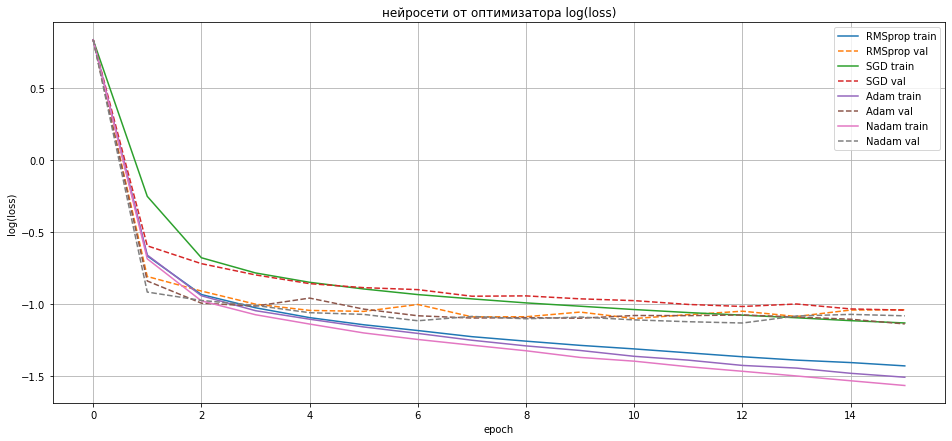

In [ ]:
# создаем модель model
model = Sequential([
                      Dense(64, activation='relu', input_shape=(784,)),
                      Dense(64, activation='tanh'),
                      Dense(10, activation='softmax'),
                      ])
# сохраняем ее веса (это начальная точка) model.save_weights('model.h5')
model.save_weights('model.h5')

plt.figure(figsize=(16,7))

# число рабочих эпох
epochs = 15
# вектор для выводв результатов
epoch = np.arange(epochs+1)

# будем изменять оптимизаторы
for i_optim in [keras.optimizers.RMSprop(),keras.optimizers.SGD(),keras.optimizers.Adam(),keras.optimizers.Nadam()]:
  # создаем рабочую модель modeli куда будем загружать эти вес (она должна быть идентичной структуры)
  modeli = Sequential([
                      Dense(64, activation='relu', input_shape=(784,)),
                      Dense(64, activation='tanh'),
                      Dense(10, activation='softmax'),
                      ])
  # загружаем веса modeli.load_weights('model.h5')
  modeli.load_weights('model.h5')
  # компилируем modeli с одним из оптимизаторов
  modeli.compile(
      optimizer=i_optim,
      loss='categorical_crossentropy',
      metrics=['accuracy'],
      )
  # вычисляем ошибку для modeli без обучения
  hh0_tr = modeli.evaluate(  train_images[:48000,:], to_categorical(train_labels[:48000]),verbose = 0)
  hh0_val = modeli.evaluate(  train_images[48000:,:], to_categorical(train_labels[48000:]),verbose = 0)
  # проводим обучение модели 
  hh = modeli.fit(
  train_images,
  to_categorical(train_labels),
  epochs=epochs,
  batch_size=32, validation_split=0.2, verbose = 0
  )
  # картинки
  plt.plot(epoch,np.log([hh0_tr[0]]+hh.history['loss']),'-',label = modeli.optimizer.get_config()['name']+' train')
  plt.plot(epoch,np.log([hh0_val[0]]+hh.history['val_loss']),'--',label = modeli.optimizer.get_config()['name']+' val')
plt.legend()
plt.grid('On')

plt.title('нейросети от оптимизатора log(loss)')
plt.xlabel('epoch')
plt.ylabel('log(loss)')
plt.show()

Лучшим вариантом является SGD, так как наименьший разрыв между accuracy и val_accuracy.

In [ ]:
hh_t = {}
hh_a = []
hh_v = []
hh_list = [hh, hh2, hh_1, hh_2, hh_3]
for i in hh_list:
    hh_a.append(i.history['accuracy'][-1])
    hh_v.append(i.history['val_accuracy'][-1])
    
    
hh_t['accuracy'] = hh_a
hh_t['val_accuracy'] = hh_v

In [ ]:
hh_d = {'layers':[], 'neurons': [], 'accuracy': [], 'val_accuracy': []}
l = [2, 2, 3, 5, 10]
n = [128, 64, 64, 64, 64]

In [ ]:
for i in range(5):
    hh_d['layers'].append(l[i])
    hh_d['neurons'].append(n[i])
    hh_d['accuracy'].append(hh_list[i].history['accuracy'][-1])
    hh_d['val_accuracy'].append(hh_list[i].history['val_accuracy'][-1])

In [ ]:
df = pd.DataFrame(hh_d)
df

,layers,neurons,accuracy,val_accuracy
0,2,128,0.922042,0.884750
1,2,64,0.883625,0.873917
2,3,64,0.938896,0.883833
3,5,64,0.934250,0.877000
4,10,64,0.911188,0.879000


Увеличение количества слоев увеличивает разрыв между accuracy и val_accuracy. Это похоже на переобучение сети. В то время как увеличение количества нейронов не приводит к переобучению.

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
y_pred = np.argmax(model1.predict(test_images), axis=1)
y_pred[:10]

313/313 [==============================] - 1s 2ms/step


array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
CM = confusion_matrix(test_labels, y_pred)
print(CM)

[[724   0  14  28   2   0 224   1   7   0]
 [  0 956   2  23   2   0  17   0   0   0]
 [ 11   0 777  12  93   0 106   0   1   0]
 [ 12   2   7 841  31   0 104   0   3   0]
 [  0   0 107  25 784   0  84   0   0   0]
 [  0   0   0   2   0 771   2 199   3  23]
 [ 64   1  97  19  71   0 737   0  11   0]
 [  0   0   0   0   0   1   0 980   0  19]
 [  5   0   1   5   8   1  18  10 952   0]
 [  0   0   0   1   0   4   1  73   0 921]]


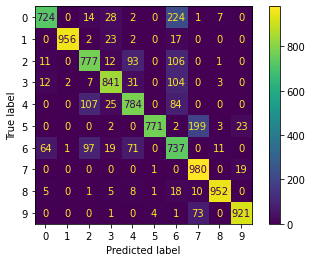

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=np.arange(10))

disp.plot(values_format = '.3g')
plt.show()